# **Regression Assignment**

# Objective:
 The objective of this assignment is to evaluate your understanding of regression techniques in supervised learning by applying them to a real-world dataset.

# Dataset:
Use the California Housing dataset available in the sklearn library. This dataset contains information about various features of houses in California and their respective median prices.



# **1.Loading and Preprocessing (2 marks):**

*  Load the California Housing dataset using the fetch_california_housing function from sklearn.
*   Convert the dataset into a pandas DataFrame for easier handling.
*  Handle missing values (if any) and perform necessary feature scaling (e.g., standardization).
*   Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

In [66]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [50]:
# Loading the dataset
housing_data = fetch_california_housing()

# Converting the dataset into a pandas DataFrame for easier handling
df=pd.DataFrame(housing_data.data,columns=housing_data.feature_names)
df['Med_price']= housing_data.target
df_features=df.drop(columns=['Med_price'])
df.head()
#df_features.head() for checking purpose

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
#Handle missing values (if any) and perform necessary feature scaling (e.g., standardization).

#checking for missing values
missing_vals=df.isna().sum()
missing_vals

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Med_price,0


In [52]:
#Since there are no missing values there is no need to perform further on it.but in case if there are some then,
#handling the missing values by droping
df=df.dropna()


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Med_price   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [54]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [55]:
#Spliting the data for training and testing
X=df_features
y=df['Med_price']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)


In [56]:
#scaling using StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Loading & Conversion:**

  The dataset was loaded using fetch_california_housing() and converted to a pandas DataFrame for better readability and manipulation using pandas functions.

**Handling Missing Values:**

We checked for missing values using .isna().sum() and found none.

However, as a precaution, .dropna() was added (optional) to handle any missing data in real-world scenarios.

**Feature Scaling (Standardization):**

Performed using StandardScaler() to ensure all features are on the same scale.

This is crucial for regression algorithms, especially those based on distance metrics or gradient descent, so that no feature dominates due to a larger range.

**Train-Test Split:**

Data was split into 80% training and 20% testing to evaluate the model’s performance on unseen data, a good practice in supervised learning tasks.

# **Regression Algorithm Implementation (5 marks):**

 Implement the following regression algorithms:

1.Linear Regression

2.Decision Tree Regressor

3.Random Forest Regressor

4.Gradient Boosting Regressor

5.Support Vector Regressor (SVR)

 For each algorithm:
Provide a brief explanation of how it works.
Explain why it might be suitable for this dataset.


# **1. Linear Regression**

how it works:

*Linear Regression models the relationship between the dependent variable (y) and one or more independent variables (X) by fitting a linear equation. It assumes a linear relationship.*

why it might be suitable:

*It’s a good baseline model to understand whether the features have a linear correlation with the target (housing prices). It's fast and interpretable.*

In [57]:
#model creation
lr_model= LinearRegression()
lr_model.fit(X_train,y_train)

#model prediction
y_pred_lr=lr_model.predict(X_test)

# **2.Decision Tree Regressor**

how it works:

*It splits the data into subsets using feature values, forming a tree where each node is a decision rule. Leaf nodes contain predicted values.*

why it might be suitable:

*It captures non-linear patterns and interactions between features without needing feature scaling.*

In [58]:
#model creation
dt_model= DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

#model prediction
y_pred_dt=dt_model.predict(X_test)

# **3.Random Forest Regressor**

how it works:

*Random Forest is an ensemble of decision trees where each tree is trained on a random sample and subset of features. It averages the predictions of all trees.*

why it might be suitable:

*It reduces overfitting and improves accuracy. It handles high-dimensional and non-linear data well.*

In [59]:
#model creation
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

#model prediction
y_pred_rf=rf_model.predict(X_test)

# **4. Gradient Boosting Regressor**

how it works:

*It builds trees sequentially, with each new tree trying to correct errors made by the previous one. It uses gradient descent to minimize the loss function.*

why it might be suitable:

*It's very effective for structured/tabular data like housing data, providing high accuracy.*

In [60]:
#model creation
gb_model=GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

#model prediction
y_pred_gb=gb_model.predict(X_test)

# **5. Support Vector Regressor (SVR)**

how it works:

*SVR tries to fit the best line (or hyperplane) within a certain margin (epsilon) from the actual data points, using support vectors.*

why it might be suitable:

*It’s useful for high-dimensional, continuous prediction problems. However, it's computationally intensive and may be slow on large datasets.*

In [61]:
#model creation
sv_model=SVR()
sv_model.fit(X_train,y_train)

#model prediction
y_pred_sv=sv_model.predict(X_test)

# **Model Evaluation and Comparison (2 marks):**

Evaluate the performance of each algorithm using the following metrics:


*   Mean Squared Error (MSE)
*   Mean Absolute Error (MAE)
*   R-squared Score (R²)

Compare the results of all models and identify:
*   The best-performing algorithm with justification.
*   The worst-performing algorithm with reasoning.





In [63]:
def evaluate_model(name,y_actual,y_predicted):
  mse=mean_squared_error(y_actual,y_predicted)
  mae=mean_absolute_error(y_actual,y_predicted)
  r2=r2_score(y_actual,y_predicted)
  return[name,mse,mae,r2]

results=[]
results.append(evaluate_model("Linear Regression",y_test,y_pred_lr))
results.append(evaluate_model("Decision Tree Regressor",y_test,y_pred_dt))
results.append(evaluate_model("Random Forest Regressor",y_test,y_pred_rf))
results.append(evaluate_model("Gradient Boosting Regressor",y_test,y_pred_gb))
results.append(evaluate_model("Support Vector Regressor",y_test,y_pred_sv))

df_results=pd.DataFrame(results,columns=['Model','MSE','MAE','R2 Score'])
df_results.sort_values(by='R2 Score',ascending=False,inplace=True)
print(df_results)

                         Model       MSE       MAE  R2 Score
2      Random Forest Regressor  0.273024  0.340358  0.802233
3  Gradient Boosting Regressor  0.298861  0.375188  0.783518
4     Support Vector Regressor  0.355910  0.395274  0.742195
1      Decision Tree Regressor  0.527581  0.464114  0.617844
0            Linear Regression  0.541752  0.538957  0.607579


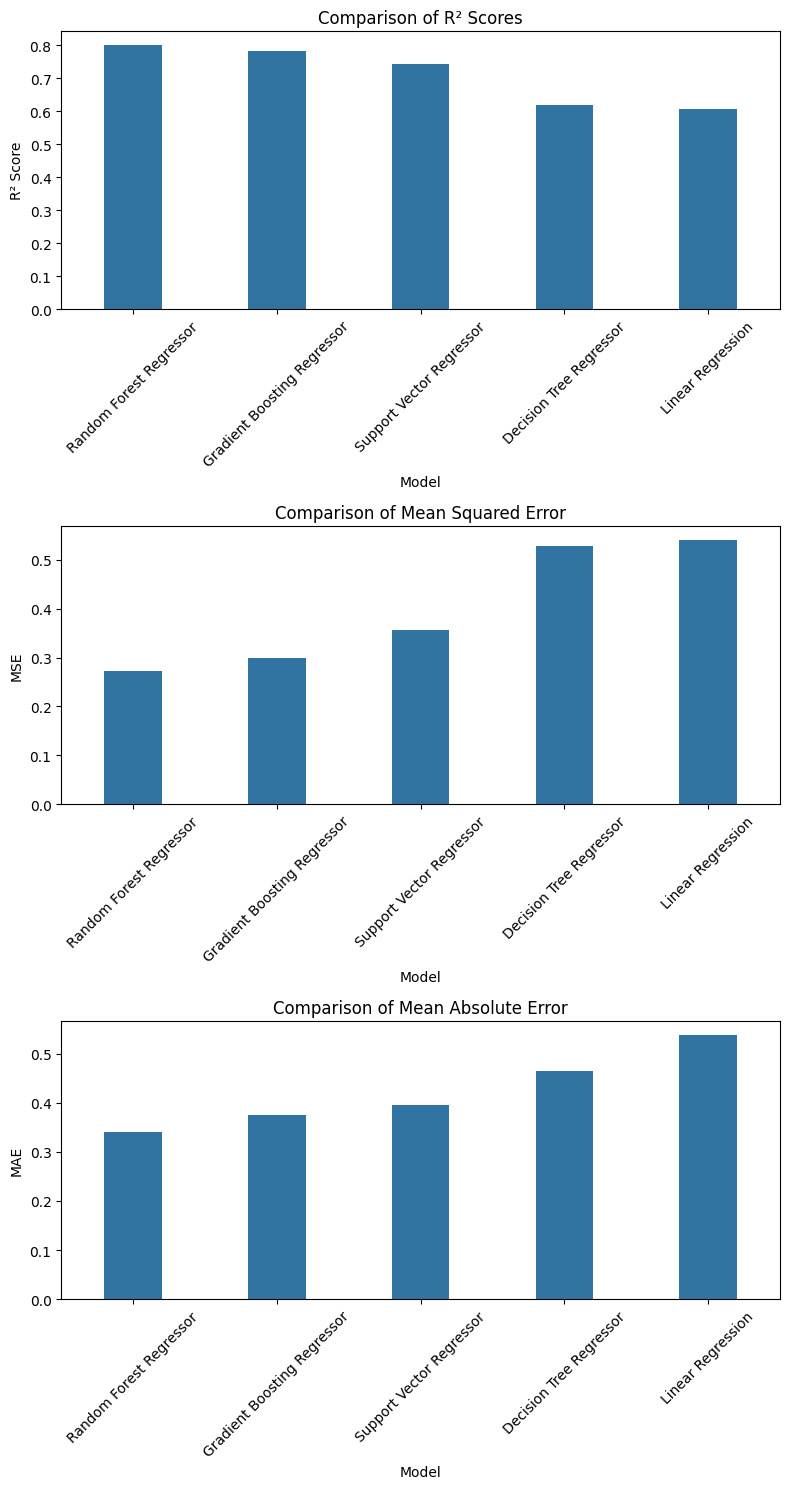

In [85]:


fig,axes= plt.subplots(3,1,figsize=(8, 15))
sns.barplot(x='Model', y='R2 Score', data=df_results, ax=axes[0], width=0.4)
axes[0].set_ylabel('R² Score')
axes[0].set_title('Comparison of R² Scores')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='MSE', data=df_results, ax=axes[1], width=0.4)
axes[1].set_ylabel('MSE')
axes[1].set_title('Comparison of Mean Squared Error')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='MAE', data=df_results, ax=axes[2], width=0.4)
axes[2].set_ylabel('MAE')
axes[2].set_title('Comparison of Mean Absolute Error')
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

**Best-Performing Algorithm: Random Forest Regressor**

Justification:

Lowest MSE (0.273) and MAE (0.340) — meaning the average error in predictions is smallest.

Highest R² score (0.802) — indicating it explains over 80% of the variance in the target variable.

Handles non-linearity and feature interactions well by combining predictions from multiple decision trees.


**Worst-Performing Algorithm: Linear Regression**

Justification:

Highest MSE (0.542) and MAE (0.539) — indicating larger errors in predictions.

Lowest R² score (0.608) — meaning it explains only about 60% of the variance.

Likely due to its assumption of linearity, which may not hold true for the housing dataset.

